**Name:** JENNIFER AGU <br>
**Student_ID:** 8882641

# Introduction

## Framing the Problem

The purpose of this analysis examines the correlation between median house value and three independent factors including household, median income and population. Linear regression and exploratory data analysis methods will help comprehend the strength of influence these independent factors have on median house value data in a chosen dataset.

## Import the required python Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Getting the data

Source: Downloaded from [Kaggle California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices/data)

In [12]:
data = pd.read_csv("housing.csv")
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Data Exploration

## Explore Statistics

In [13]:
columns = ["median_income", "population", "households", "median_house_value"]
statistics = data[columns].describe()
print("Descriptive Statistics")
print(statistics)

Descriptive Statistics
       median_income    population    households  median_house_value
count   20640.000000  20640.000000  20640.000000        20640.000000
mean        3.870671   1425.476744    499.539680       206855.816909
std         1.899822   1132.462122    382.329753       115395.615874
min         0.499900      3.000000      1.000000        14999.000000
25%         2.563400    787.000000    280.000000       119600.000000
50%         3.534800   1166.000000    409.000000       179700.000000
75%         4.743250   1725.000000    605.000000       264725.000000
max        15.000100  35682.000000   6082.000000       500001.000000


## Creating three Seaborn scatter plots of median house value vs. median income, population and number of households

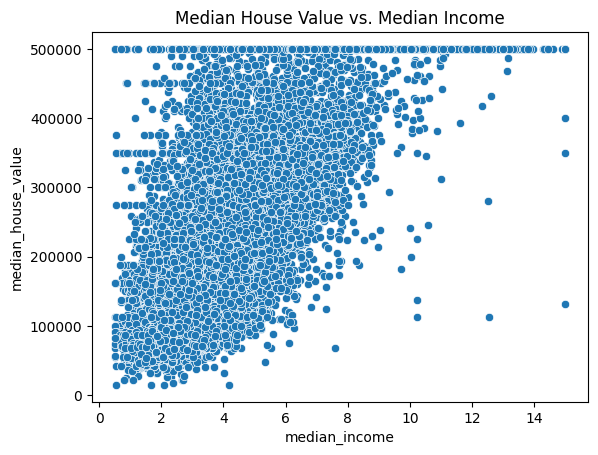

In [14]:
# Scatter plot for median house value vs. median income
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.title('Median House Value vs. Median Income')
plt.show()

**Interpretation of the graph and insights:** 
Higher incomes tend to raise home values but the $500,000 limit on house prices might produce misleading analysis. The majority of clustering points happen between areas with income levels 2-8 and house value ranges from 100k to 300k while the dataset contains some outliers. The observed pattern is mostly linear but the bounded data points along with the inconsistent dispersion can affect the validity of regression models requiring either log transformation or outlier management or alternative robust regression methods.

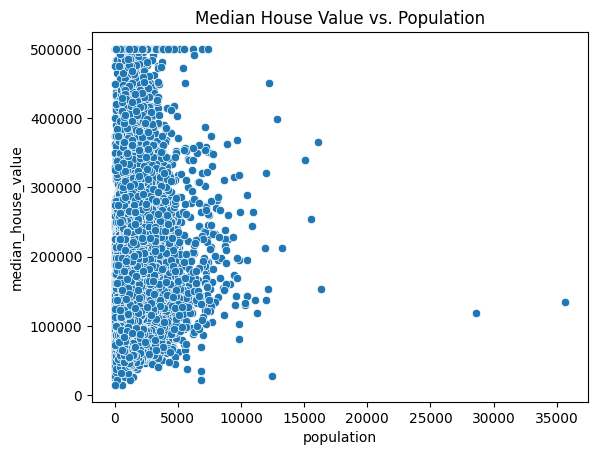

In [15]:
# Scatter plot for median house value vs. population
sns.scatterplot(x='population', y='median_house_value', data=data)
plt.title('Median House Value vs. Population')
plt.show()

**Interpretation of the graph and insights:** 
The data shows weak population value correlation while most data clustering remain within 0-10,000 population range with a price cap at $500,000 which affects the results. The data distribution becomes too erratic after reaching 10,000 population therefore research results cannot provide dependable predictions. Results become significantly skewed from the price cap while the wide variability of the data shows population works poorly as a single predictor.

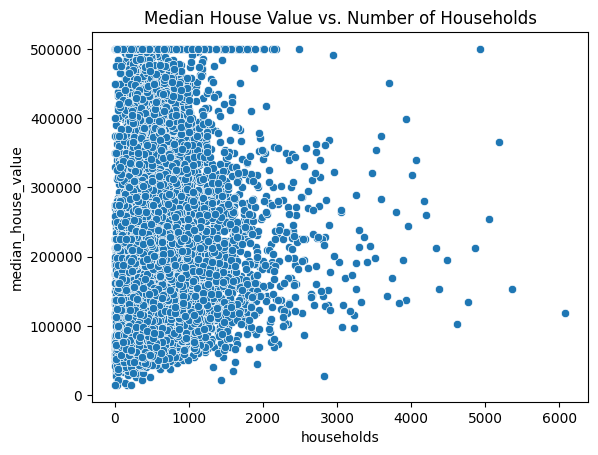

In [16]:
# Scatter plot for median house value vs. number of households
sns.scatterplot(x='households', y='median_house_value', data=data)
plt.title('Median House Value vs. Number of Households')
plt.show()

**Interpretation of the graph and insights:** 

## describing the 4 variables 

# Data Preprocessing

In [17]:
data_preprocessed = data[data.median_house_value != 500001]
print(f"After filtering, there are {len(data_preprocessed)} records, versus {len(data)} before filtering")

After filtering, there are 19675 records, versus 20640 before filtering


# Modeling and Evaluation

## Train and Test Split

Split the data into training/testing sets. 
Use the first 80% of the data for training.

In [18]:
train_size = int(len(data_preprocessed) * 0.8)
train = data_preprocessed[:train_size]
test = data_preprocessed[train_size:]

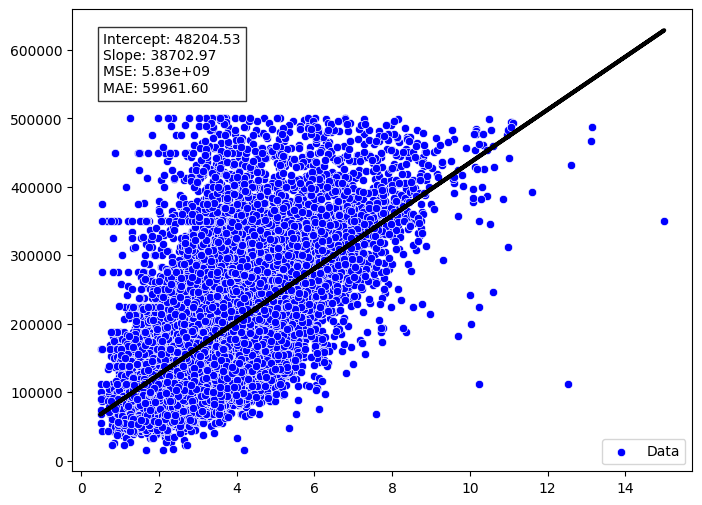

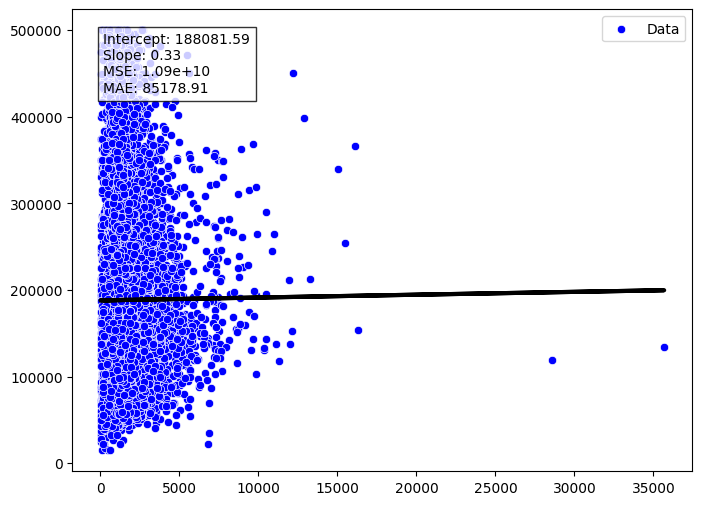

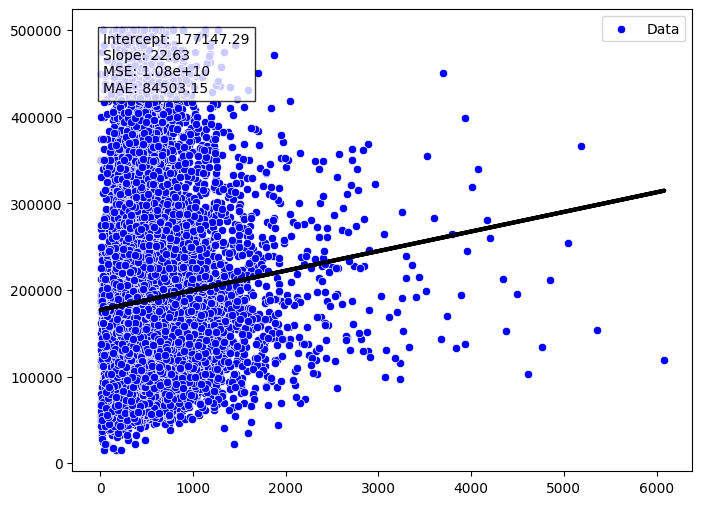

Independent Variable            Intercept                Slope  Mean Squared Error  Mean Absolute Error
       median_income [48204.534368169785]  [38702.97233842378]        5.831038e+09         59961.600991
          population [188081.58862583563] [0.3286297271249774]        1.086378e+10         85178.908981
          households [177147.28853834848] [22.625725908661156]        1.075928e+10         84503.147235


In [19]:
independent_variable = ['median_income', 'population', 'households']
models = {}
prediction = {}
Table = []

for variable in independent_variable:
      model = linear_model.LinearRegression()

      model.fit(X=train[[variable]], y=train[["median_house_value"]])

      models[variable] = model

      prediction[variable] = model.predict(test[[variable]])

      mse = mean_squared_error(test["median_house_value"], prediction[variable])
      mae = mean_absolute_error(test["median_house_value"], prediction[variable])
      

      Table.append({"Independent Variable": variable, "Intercept": model.intercept_, "Slope": model.coef_[0], "Mean Squared Error": mse, "Mean Absolute Error": mae})

      plt.figure(figsize=(8,6))
      sns.scatterplot(x=train[[variable]].values.flatten(), y=train["median_house_value"].values.flatten(), color="blue", label="Data")
      plt.plot(train[[variable]].values.flatten(), model.predict(train[[variable]]).flatten(), color="black", linewidth=3, label= "Regression Line")
      text = f"Intercept: {float(model.intercept_.item()):.2f}\nSlope: {float(model.coef_[0].item()):.2f}\nMSE: {mse:.2e}\nMAE: {mae:.2f}"
      plt.text(0.05, 0.95, text, fontsize=10, transform=plt.gca().transAxes, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))
      plt.legend
      plt.show()


Table_df = pd.DataFrame(Table)
print(Table_df.to_string(index=False))

# Conclusion